In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

In [33]:
init_printing(use_unicode=True)
theta, theta2, theta3,theta4,gamma1,gamma2,gamma3,gamma4= symbols('theta theta2 theta3 thetha4 gamma1 gamma2 gamma3 gamma4 ',real=True)
beta=Symbol('beta',real=True)
jones1= Matrix([0,1])
jones0= Matrix([1,0])
jones1

In [34]:
def N_mach(N,k):
    if k==1:
        lista=list()
        K=symarray('theta', N+1,real=True)
        for i in range(1,N+1):
            l=i
            BS=Matrix([[cos(K[i]),I*sin(K[i])],[I*sin(K[i]),cos(K[i])]])
            lista.append(BS)
    else:
        t=Symbol('theta1',real=True)
        lista=Matrix([[cos(t/N),I*sin(t/N)],[I*sin(t/N),cos(t/N)]])
    return lista
def N_mach_zehnder(N,k):
    K=N_mach(N,k)
    jones1= Matrix([0,1])
    jones0= Matrix([1,0])
    M1=Matrix([[0,exp(I*gamma2)],[exp(I*gamma1),0]])
    A=Matrix([[ 1,0],[0,beta*exp(I*theta)]])
    r=jones0
    if k==1:
        for i in range(0,N):
            if i==N-1:
                r=simplify(K[i]*r)
            else:
                r=simplify(M1*A*K[i]*r)
    else:
        r=K*(M1*A*K)**(N-1)*r
    return r
def N_Interferomemer(N,k):
    r=N_mach_zehnder(N,k)
    p1=jones0.T*r
    p1=p1[0]*conjugate(p1[0])
    p1=re(p1)
    p2=jones1.T*r
    p2=p2[0]*conjugate(p2[0])
    p2=re(p2)
    pabs=1-p1-p2
    K=symarray('theta', N+1,real=True)
    return pabs,p1,p2,K

In [4]:
pabs,pd1,pd2,K=N_Interferomemer(3,1)

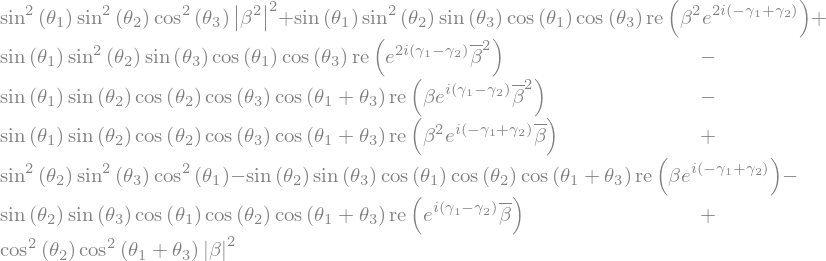

In [7]:
simplify(pd1)

In [6]:
import numpy as np

In [7]:
theta1s=np.linspace(0,2*np.pi,100)
#theta2s=theta1s-(np.pi/2)
#betas=np.linspace(0,1,100)


In [8]:
import matplotlib.pyplot as plt

In [9]:
pd1=pd1.subs({K[2]:(pi/2)-K[1],gamma1:0,gamma2:0})
pd1

In [10]:
f=lambdify(K[1],pd1.subs(beta,0),'numpy')

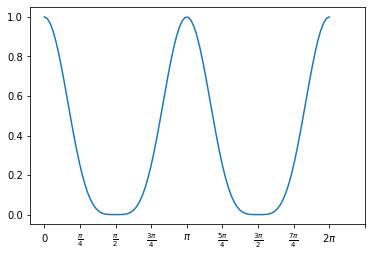

In [11]:
plt.plot(theta1s,f(theta1s))
plt.xticks(np.arange(0,2*np.pi+1 , step=np.pi/4),[r'$0$',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',r'$\pi$',r'$\frac{5\pi}{4}$',r'$\frac{3\pi}{2}$',r'$\frac{7\pi}{4}$',r'$2\pi$'])
plt.show()

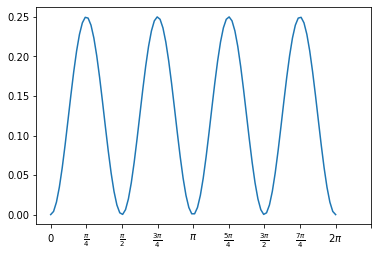

In [12]:
pd2=pd2.subs({K[2]:(pi/2)-K[1],gamma1:0,gamma2:0})
f2=lambdify(K[1],pd2.subs(beta,0),'numpy')
plt.plot(theta1s,f2(theta1s))
plt.xticks(np.arange(0,2*np.pi+1 , step=np.pi/4),[r'$0$',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',r'$\pi$',r'$\frac{5\pi}{4}$',r'$\frac{3\pi}{2}$',r'$\frac{7\pi}{4}$',r'$2\pi$'])
plt.show()

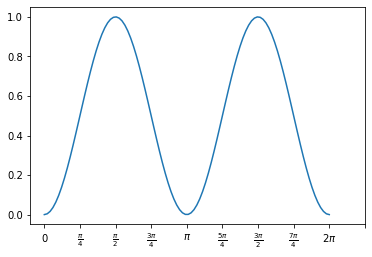

In [13]:
pabs=pabs.subs({K[2]:(pi/2)-K[1],gamma1:0,gamma2:0})
f3=lambdify(K[1],pabs.subs(beta,0),'numpy')
plt.plot(theta1s,f3(theta1s))
plt.xticks(np.arange(0,2*np.pi+1 , step=np.pi/4),[r'$0$',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',r'$\pi$',r'$\frac{5\pi}{4}$',r'$\frac{3\pi}{2}$',r'$\frac{7\pi}{4}$',r'$2\pi$'])
plt.show()

In [13]:
from sympy import symbols
from sympy.plotting import plot3d
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [23]:
def con_barra(plot,n):
    plot2 = plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    backend = plot2.backend(plot2)
    backend.ax = ax
    backend._process_series(backend.parent._series, ax, backend.parent)
    plt.close(backend.fig)
    ax.collections[0].set_cmap('viridis') # optionally change the colormap
    cbar=plt.colorbar(ax.collections[0],ticks=[0.2,0.4,0.6,0.8,0.99])
    cbar.ax.tick_params(labelsize=20)
    plt.xticks(fontsize=13)
    ax.set_xlabel(r'$\theta_{1}$',fontsize=20)
    ax.set_ylabel(r'$\theta_{o}$',fontsize=20)
    if n==1:
        ax.set_title(r'$P_{D_{1}}$',fontsize=25)
    elif n==2:
        ax.set_title(r'$P_{D_{2}}$',fontsize=25)
    else:
        ax.set_title(r'$P_{abs}$',fontsize=25)
    #plt.xticks(np.arange(0,2*np.pi +1, step=np.pi/4),[r'$0$',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',r'$\pi$',r'$\frac{5\pi}{4}$',r'$\frac{3\pi}{2}$',r'$\frac{7\pi}{4}$',r'$2\pi$'],fontsize=13)
    #plt.yticks(np.arange(0,2*np.pi +1, step=np.pi/4),[r'$0$',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',r'$\pi$',r'$\frac{5\pi}{4}$',r'$\frac{3\pi}{2}$',r'$\frac{7\pi}{4}$',r'$2\pi$'],fontsize=13)
    ax.set_zticks([0,0.25,0.5,0.75,1],[r'$0$',r'$0.25$',r'$0.5$',r'$0.75$',r'$1$'])
    for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(13)
    return plt.show()

In [36]:
pabs,pd1,pd2,K=N_Interferomemer(3,1)

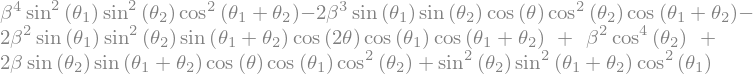

In [38]:
pd2.subs({ gamma1:0,gamma2:0,K[3]:(pi/2)-K[1]-K[2]})

<IPython.core.display.Javascript object>


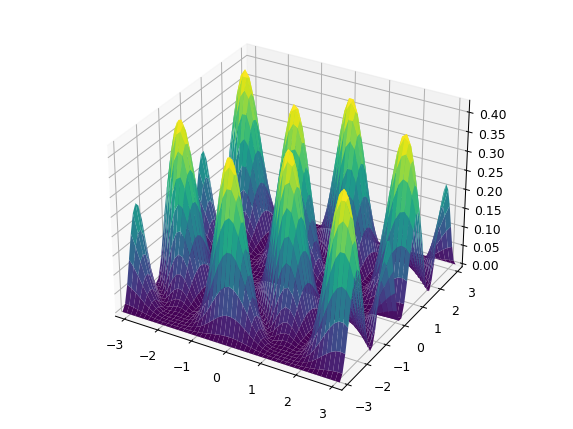

<IPython.core.display.Javascript object>


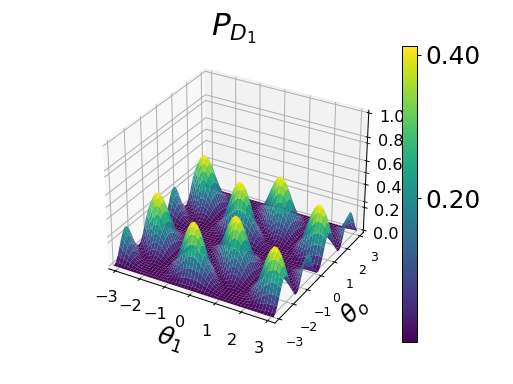

<IPython.core.display.Javascript object>

/home/mcditoos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


In [30]:
con_barra(plot3d(pd1.subs({ gamma1:0,gamma2:0,K[3]:(pi/2)-K[1]-K[2],beta:0}),(K[1],-pi,pi),(K[2],-pi,pi)),1)

<IPython.core.display.Javascript object>


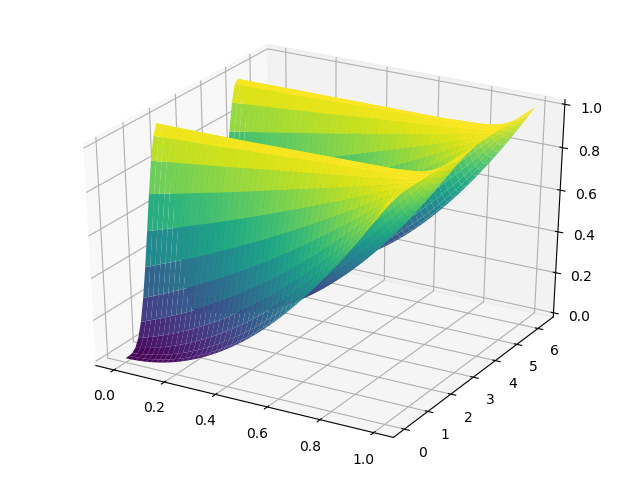

<IPython.core.display.Javascript object>


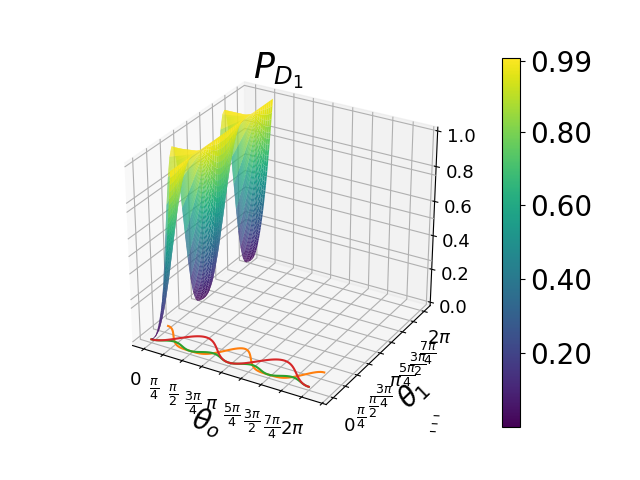

<IPython.core.display.Javascript object>


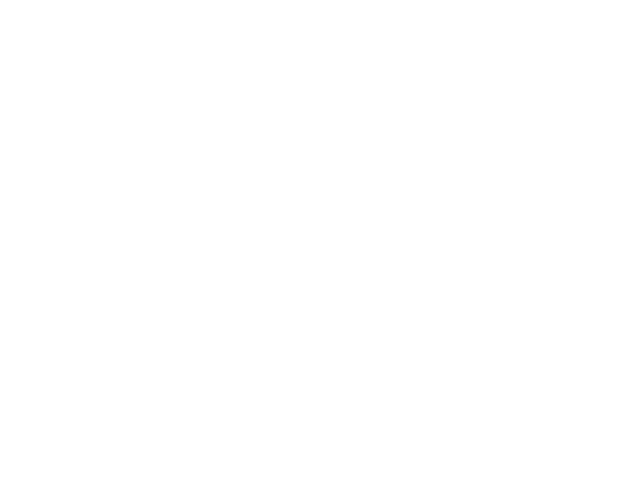

In [20]:
con_barra(plot3d(pd1.subs({ gamma1: 0,gamma2:0,K[2]:(pi/2)-K[1]}),(beta,0,1),(K[1],0,2*pi)),1)

<IPython.core.display.Javascript object>


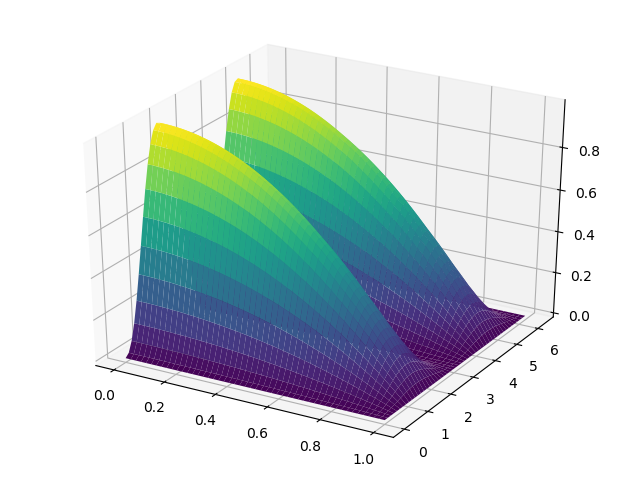

<IPython.core.display.Javascript object>


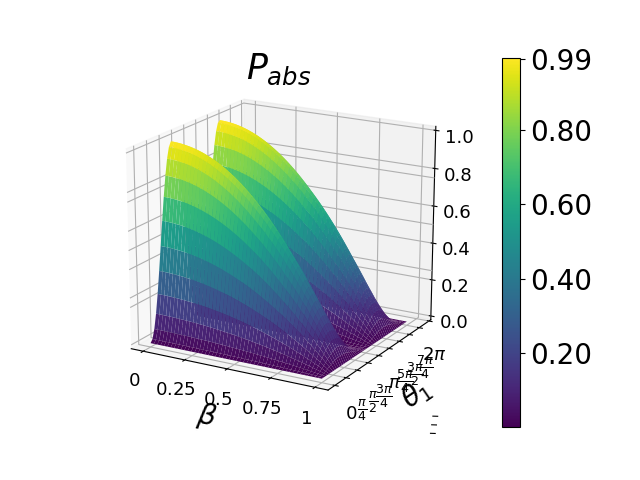

<IPython.core.display.Javascript object>


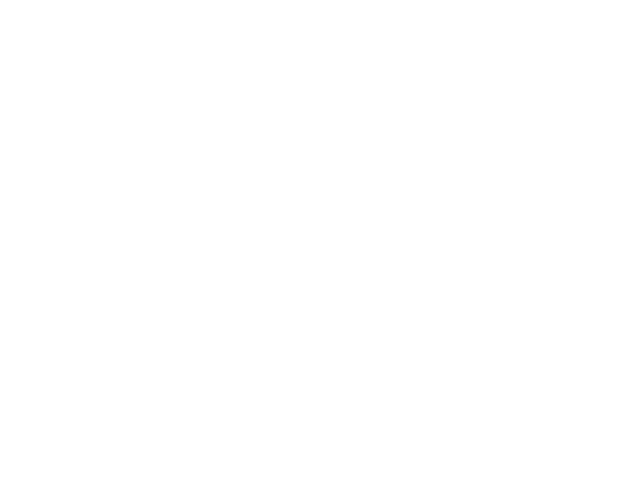

In [30]:
con_barra(plot3d(pabs.subs({ gamma1: 0,gamma2:0,K[2]:(pi/2)-K[1]}),(beta,0,1),(K[1],0,2*pi)),3)